In [1]:
import cv2
import matplotlib
import numpy as np
import os, random
from matplotlib import pyplot as plt
# Import interaction widgets and functions
from ipywidgets import interact, interactive, interact_manual



# Local histogram-specific imports from skimage
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank

from skimage import data, img_as_float
from skimage import exposure


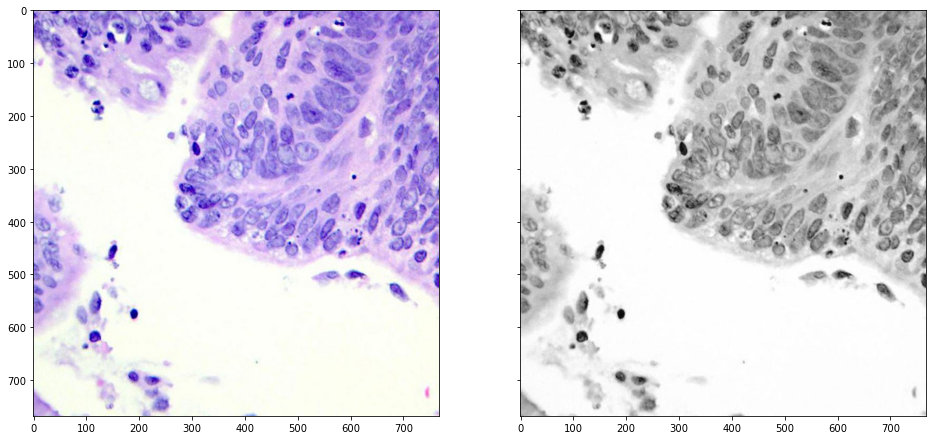

In [2]:
# Load the image in color (OpenCV standard = BGR)
orig_ca = cv2.imread("data\\colon_image_sets\\colonca409.jpeg", cv2.IMREAD_COLOR)
# Convert to RGB
orig_ca = cv2.cvtColor(orig_ca, cv2.COLOR_BGR2RGB)

# Load the image in grayscale
gray_ca = cv2.imread("data\\colon_image_sets\\colonca409.jpeg", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig_ca)
ax[1].imshow(gray_ca, 'gray')


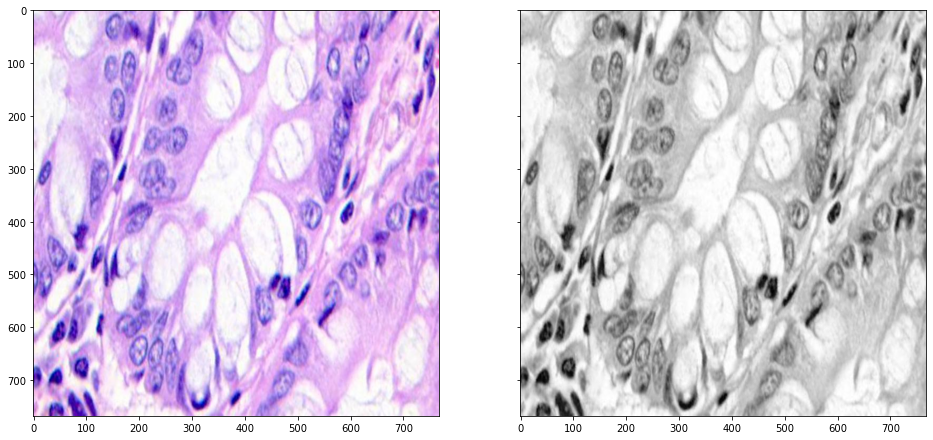

In [3]:
# Load the image in color (OpenCV standard = BGR)
orig_n = cv2.imread("data\\colon_image_sets\\colonn147.jpeg", cv2.IMREAD_COLOR)
# Convert to RGB
orig_n = cv2.cvtColor(orig_n, cv2.COLOR_BGR2RGB)

# Load the image in grayscale
gray_n = cv2.imread("data\\colon_image_sets\\colonn147.jpeg", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig_n)
ax[1].imshow(gray_n, 'gray')


In [4]:
modes = ['cv2.THRESH_BINARY',
         'cv2.THRESH_BINARY_INV',
         'cv2.THRESH_TRUNC',
         'cv2.THRESH_TOZERO',
         'cv2.THRESH_TOZERO_INV']



def my_threshold(thresh, modeStr, size_open, size_close):
    global gray_n
    global gray_ca
    
    img = gray_n
    img_ca = gray_ca
    
    mode = eval(modeStr)
    
    th, dst = cv2.threshold(img, thresh, 255, mode)
    th_ca, dst_ca = cv2.threshold(img_ca, thresh, 255, mode)
    
    
    kernel1 = np.ones((size_open,size_open),np.uint8)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size_open,15))
    kernel2 = np.ones((size_close,size_close),np.uint8) 
    opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)
    
    opening_ca = cv2.morphologyEx(dst_ca, cv2.MORPH_OPEN, kernel1)
    closing_ca = cv2.morphologyEx(opening_ca, cv2.MORPH_CLOSE, kernel2)

    fig, axes = plt.subplots(2, 4, figsize=(16, 12), sharex=True, sharey=True)
#     ax = axes.ravel()
    plt.subplot(2,4,1)
    plt.imshow(img, 'gray')
    
    plt.subplot(2,4,2)
    plt.imshow(dst, 'gray')
    
    plt.subplot(2,4,3)
    plt.imshow(opening, 'gray')
    
    plt.subplot(2,4,4)
    plt.imshow(closing, 'gray') 
    
    plt.subplot(2,4,5)
    plt.imshow(img_ca, 'gray')
    
    plt.subplot(2,4,6)
    plt.imshow(dst_ca, 'gray')
    
    plt.subplot(2,4,7)
    plt.imshow(opening_ca, 'gray')
    
    plt.subplot(2,4,8)
    plt.imshow(closing_ca, 'gray')
    
    print('n = ', cv2.countNonZero(closing))
    print('ca = ', cv2.countNonZero(closing_ca))

    
#     return dst

In [5]:
interactive(my_threshold, modeStr=modes, thresh=(1, 255), size_open=(5, 55), size_close=(5, 55,))


interactive(children=(IntSlider(value=128, description='thresh', max=255, min=1), Dropdown(description='modeSt…

In [21]:




def funcao(img, thresh, size_open, size_close):
   
    mode = eval('cv2.THRESH_BINARY')
    
    th, dst = cv2.threshold(img, thresh, 255, mode)
    
    
    kernel1 = np.ones((size_open,size_open),np.uint8)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size_open,15))
    kernel2 = np.ones((size_close,size_close),np.uint8) 
    opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)
    
#     fig, axes = plt.subplots(2, 4, figsize=(16, 12), sharex=True, sharey=True)
# #     ax = axes.ravel()
    plt.subplot(1,2,1)
    plt.imshow(img, 'gray')
    
#     plt.subplot(1,4,2)
#     plt.imshow(dst, 'gray')
    
#     plt.subplot(1,4,3)
#     plt.imshow(opening, 'gray')
    
    plt.subplot(1,2,2)
    plt.imshow(closing, 'gray') 
    plt.show()
    
#     print('white_pixels = ', cv2.countNonZero(closing))

    
    return cv2.countNonZero(closing)

In [8]:
teste_img = cv2.imread("data\\colon_image_sets\\colonca409.jpeg", cv2.IMREAD_GRAYSCALE)
funcao(teste_img, 240, 25, 40)

white_pixels =  277849


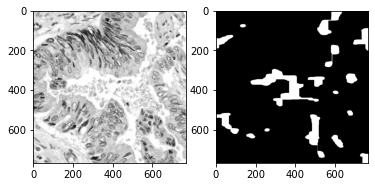

colonca3348.jpeg c 56488


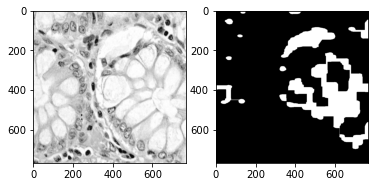

colonn841.jpeg n 98101


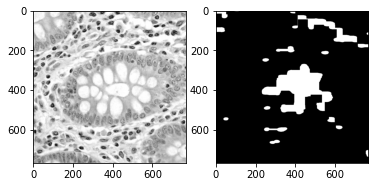

colonn4721.jpeg n 62452


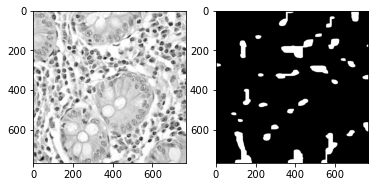

colonn2988.jpeg n 46836


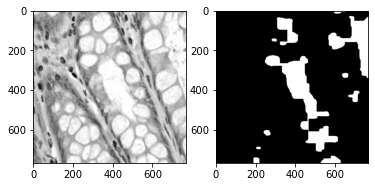

colonn2309.jpeg n 83194


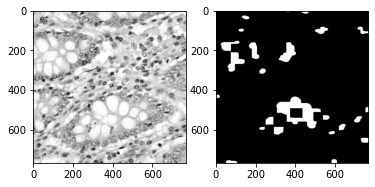

colonn2510.jpeg n 43172


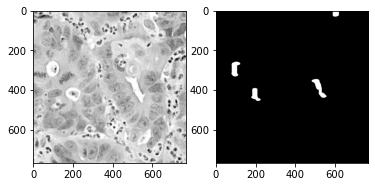

colonca3266.jpeg c 7346


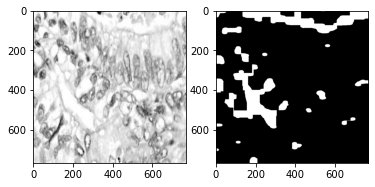

colonca1191.jpeg c 80351


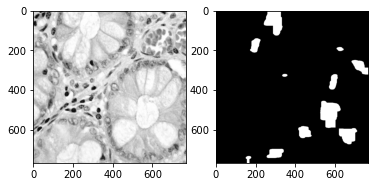

colonn3230.jpeg n 39625


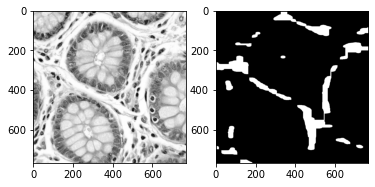

colonn50.jpeg n 57723


In [22]:
path = "data\\colon_image_sets\\"

for i in range(10):
    rnd = random.choice(os.listdir(path))
    
    img = cv2.imread(path + rnd, cv2.IMREAD_GRAYSCALE)
    print(rnd, rnd[5], funcao(img, 240, 25, 40))
